C:\Users\Ayush_trainee\AppData\Local\Temp\ipykernel_3324\691252170.py:29: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  device_time = datetime.utcfromtimestamp(data["device_t"])


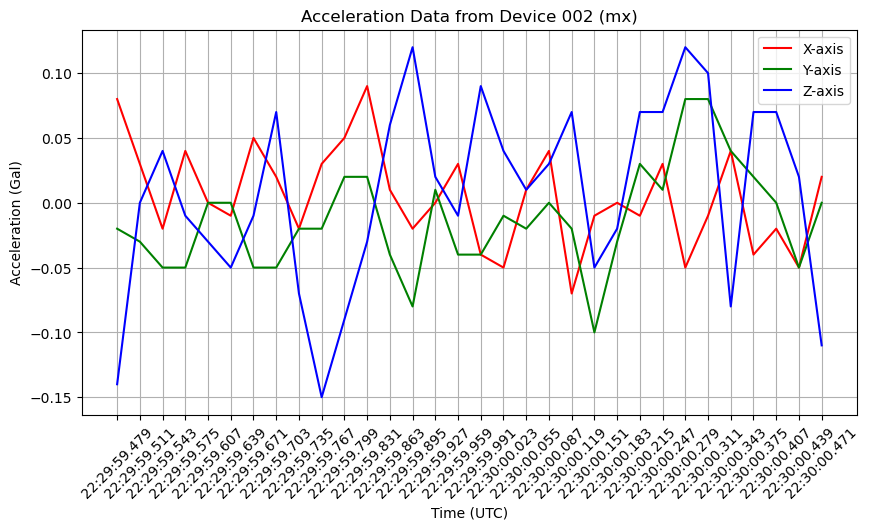

In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Sample JSON data
json_data = '''{
    "country_code": "mx",
    "device_id": "002",
    "x": [0.08, 0.03, -0.02, 0.04, 0, -0.01, 0.05, 0.02, -0.02, 0.03, 0.05, 0.09, 0.01, -0.02, 0, 0.03, -0.04, -0.05, 0.01, 0.04, -0.07, -0.01, 0, -0.01, 0.03, -0.05, -0.01, 0.04, -0.04, -0.02, -0.05, 0.02],
    "y": [-0.02, -0.03, -0.05, -0.05, 0, 0, -0.05, -0.05, -0.02, -0.02, 0.02, 0.02, -0.04, -0.08, 0.01, -0.04, -0.04, -0.01, -0.02, 0, -0.02, -0.1, -0.03, 0.03, 0.01, 0.08, 0.08, 0.04, 0.02, 0, -0.05, 0],
    "z": [-0.14, 0, 0.04, -0.01, -0.03, -0.05, -0.01, 0.07, -0.07, -0.15, -0.09, -0.03, 0.06, 0.12, 0.02, -0.01, 0.09, 0.04, 0.01, 0.03, 0.07, -0.05, -0.02, 0.07, 0.07, 0.12, 0.1, -0.08, 0.07, 0.07, 0.02, -0.11],
    "device_t": 1561242600.503,
    "cloud_t": 1561242600.841,
    "sr": 31.25
}'''

# Parse JSON
data = json.loads(json_data)

# Extract acceleration data and sampling rate
x = np.array(data["x"])
y = np.array(data["y"])
z = np.array(data["z"])
sr = data["sr"]

duration = len(x) / sr

device_time = datetime.utcfromtimestamp(data["device_t"])
sample_dt = device_time.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]  # Convert to GMT with milliseconds

time = [(device_time - timedelta(seconds=(duration - i / sr))).strftime('%H:%M:%S.%f')[:-3] for i in range(len(x))]

# Plot acceleration data
plt.figure(figsize=(10, 5))
plt.plot(time, x, label='X-axis', color='r')
plt.plot(time, y, label='Y-axis', color='g')
plt.plot(time, z, label='Z-axis', color='b')
plt.xlabel('Time (UTC)')
plt.ylabel('Acceleration (Gal)')
plt.title(f'Acceleration Data from Device {data["device_id"]} ({data["country_code"]})')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()
